In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Introduction 

__Dataset information__ - It contains patients' information regarding their diebetes test. It shows whether patient has diebetes or not. 

__Aim__ - To train and create a model which correctly classify whether a patient has diebetes or not by looking at around test data.

In [4]:
df = pd.read_csv("diabetes.csv")
df.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


### Data visualisation and analytics 

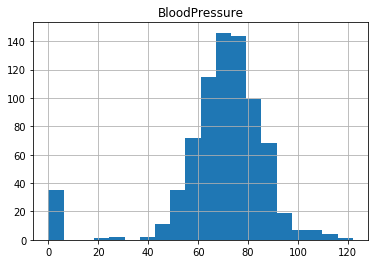

Average Blood Pressure with Diabetic patients is - 70.82
Average Blood Pressure of Non Diabetic patients is - 68.18


In [21]:
df.hist(column='BloodPressure', bins=20)
plt.show()

mean = df[df['Outcome']==1]['BloodPressure'].mean()
print("Average Blood Pressure with Diabetic patients is - %.2f"%(mean))
mean2 = df[df['Outcome']==0]['BloodPressure'].mean()
print("Average Blood Pressure of Non Diabetic patients is - %.2f"%(mean2))

From the above data visualisation and result, we can see that blood pressure is not a good identicator for diabetes, because both diabetic and non diabetic patients has similar average blood pressure

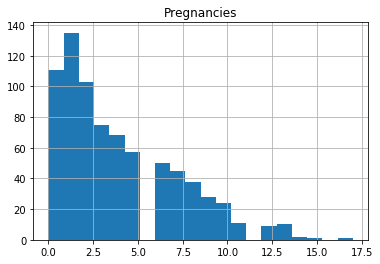

Average pregnancies of a diabetic patients is 4.87
Average pregnancies of a non-diabetic patients is 3.30


In [25]:
positive = df[df['Outcome'] == 1]
negative = df[df['Outcome'] == 0]

df.hist(column="Pregnancies", bins=20)
plt.show()
mean = positive['Pregnancies'].mean()
mean2 = negative['Pregnancies'].mean()

print("Average pregnancies of a diabetic patients is %.2f"%(mean))
print("Average pregnancies of a non-diabetic patients is %.2f"%(mean2))

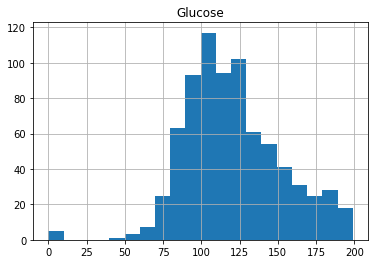

Average glucose of diabetic patient - 141.26
Average glocuse of non-diabetic patient - 109.98


In [29]:
df.hist(column="Glucose", bins=20)
plt.show()
mean = positive['Glucose'].mean()
mean2 = negative['Glucose'].mean()
print("Average glucose of diabetic patient - %.2f"%(mean))
print("Average glocuse of non-diabetic patient - %.2f"%(mean2))

The above data shows that high glucose can be a good predictor of diabetes. 

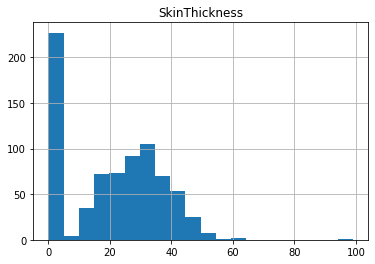

Average skin thickness of diabetic patient - 22.16
Average skin thickness of non-diabetic patient - 19.66


In [31]:
df.hist(column="SkinThickness", bins=20)
plt.show()
mean = positive['SkinThickness'].mean()
mean2 = negative['SkinThickness'].mean()
print("Average skin thickness of diabetic patient - %.2f"%(mean))
print("Average skin thickness of non-diabetic patient - %.2f"%(mean2))

Another fair indicator of diabetes.

### Preparation for model training and creation

In [40]:
cols = df.columns
cols = cols[0:len(cols)-1]
X = df[cols].values # Features #  2D Array for machine learning algorithms
y = df['Outcome'].values # Class 

#### Normalise data

In this section we will standarise all our data so that each column will have a mean of zero and a unit deviation. 

In [43]:
import sklearn.preprocessing as normaliser

X = normaliser.StandardScaler().fit(X).transform(X.astype(float))

#### Dividing data into train and test

In [47]:
from sklearn.model_selection import train_test_split

xlearn, xtest, ylearn, ytest = train_test_split(X, y, test_size=0.2, random_state=4)
print("Learning data - {} rows | Testing data - {} rows".format(xlearn.shape[0], xtest.shape[0]))

Learning data - 614 rows | Testing data - 154 rows


#### Fitting the model

In this case, we will be using K-Nearest Neighbour algorithm to train our classifer. In this algorithm, the unknown object is identifier by comparing it with K-Nearest neighbouring objects and selecting the class of most frequence object's class.

In [54]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier().fit(xlearn, ylearn)
y_hat = model.predict(xtest)

print(y_hat[0:10])
print(ytest[0:10])

[1 0 0 1 0 0 1 1 1 0]
[0 0 0 0 1 1 1 1 1 0]


#### Accuracy of our classifier

Accuracy of the model on training data : 0.8192182410423453
Accuracy of the model on testing data : 0.7402597402597403


From the above data, we can see that our model has 74% accuracy on the test data and 81% accuracy on the train data. As accuracy on train data is not very close 1, which means the model is not overfitted.